Epoch [100/1000], Loss: 875744.2500
Epoch [200/1000], Loss: 732722.8125
Epoch [300/1000], Loss: 605588.4375
Epoch [400/1000], Loss: 241069.8281
Epoch [500/1000], Loss: 225272.4844
Epoch [600/1000], Loss: 577114.0625
Epoch [700/1000], Loss: 4528.5410
Epoch [800/1000], Loss: 456014.1562
Epoch [900/1000], Loss: 57461.9766
Epoch [1000/1000], Loss: 187748.7188


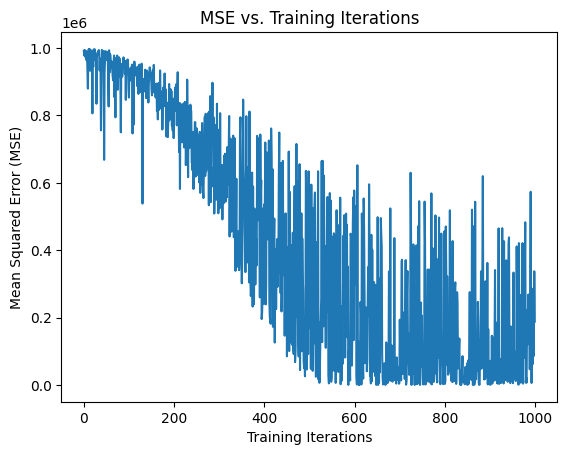

In [8]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pdb


# Set random seed for reproducibility
torch.manual_seed(42)

# Random data generator
def generate_random_set():
    N_k = np.random.randint(10, 101)
    X_k = np.random.choice(1000, N_k, replace=False)
    return X_k

# Set neural network
class SetNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SetNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Training parameters
input_size = 1000
hidden_size = 128
num_epochs = 1000
learning_rate = 0.001

# Create model and optimizer
model = SetNet(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
mse_list = []
for epoch in range(num_epochs):
    # Generate random set
    X_k = generate_random_set()


    # Convert to PyTorch tensor
    X_k_tensor = torch.zeros(1, input_size)
    X_k_tensor[0, X_k] = 1

    # Forward pass
    output = model(X_k_tensor)

    # Compute loss
    target = torch.tensor([[X_k.max()]], dtype=torch.float32)
    loss = criterion(output, target)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store MSE for plotting
    mse_list.append(loss.item())

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot MSE vs. training iterations
plt.plot(mse_list)
plt.xlabel("Training Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Training Iterations")
plt.show()

1. Fully Connected Layers:
   - The network uses two fully connected layers (`nn.Linear`) to process the input set.
   - Fully connected layers are not inherently equivariant or invariant to permutations or size variations. However, in this case, __the input representation__ (fixed-size tensor with binary indicators) allows the network to handle sets of varying sizes, which is a __permutation-invariant layer__.

2. Max Pooling (implicit):
   - The network is trained to predict the maximum value of the input set.
   - Although there is no explicit max pooling layer in the network architecture, the task itself inherently involves finding the maximum value among the elements of the set.
   - Max pooling is a __permutation-invariant__ operation, as the maximum value remains the same regardless of the order of elements in the set.

The current design choice demonstrates the use of permutation invariance and size invariance principles from a geometric deep learning perspective, while keeping the architecture straightforward.